In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras import datasets
from keras import layers
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import os
import PIL
import PIL.Image

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)
# (x_train, y_train), (x_test, y_test) = datasets.flowers.load_data()

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


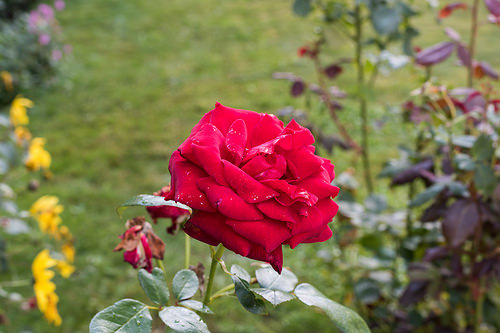

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[3]))

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


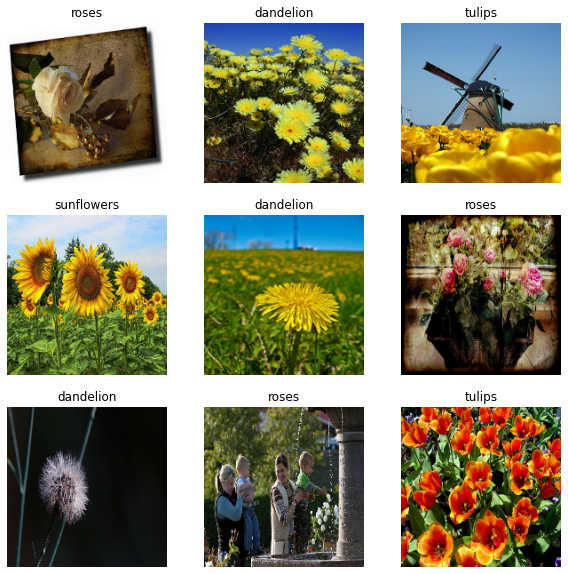

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.96902645


In [13]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [15]:
history = model.fit(
              train_ds,
              validation_data=val_ds,
              epochs=3
            )

Epoch 1/3
92/92 [==============================] - 101s 1s/step - loss: 1.2830 - accuracy: 0.4724 - val_loss: 1.0934 - val_accuracy: 0.5926
Epoch 2/3
92/92 [==============================] - 94s 1s/step - loss: 1.0136 - accuracy: 0.5933 - val_loss: 0.9872 - val_accuracy: 0.6090
Epoch 3/3
92/92 [==============================] - 103s 1s/step - loss: 0.8354 - accuracy: 0.6887 - val_loss: 0.9561 - val_accuracy: 0.6172


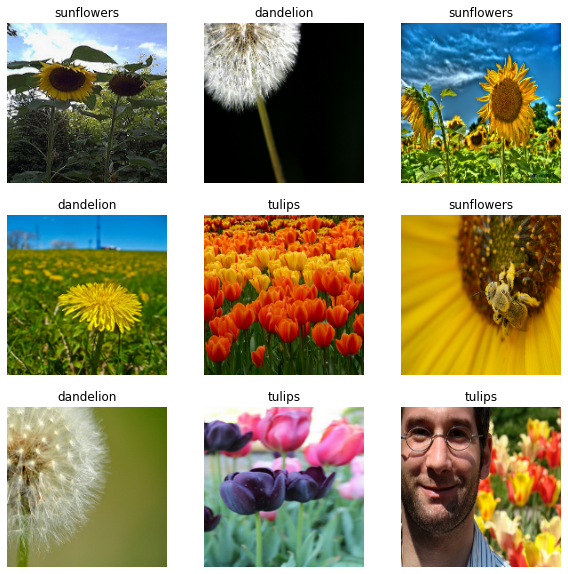

In [16]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [18]:
model.save('flower_weights.h5')

In [54]:
CLASS_NAMES = np.array(train_ds.class_names)
print(CLASS_NAMES)
print(type(CLASS_NAMES))


image_val_batch, label_val_batch = next(iter(val_ds))


# class_names[labels[i]]

preds = model.predict(image_val_batch)

print(label_val_batch)
preds_single = CLASS_NAMES[np.argmax(preds, axis = -1)]
actual_single = CLASS_NAMES[label_val_batch]

print(preds_single)
print(actual_single)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']
<class 'numpy.ndarray'>
tf.Tensor([4 3 1 0 3 0 1 2 3 0 3 3 3 1 1 1 0 0 2 4 0 0 4 4 2 4 1 1 4 4 0 4], shape=(32,), dtype=int32)
['roses' 'sunflowers' 'dandelion' 'daisy' 'sunflowers' 'daisy' 'dandelion'
 'tulips' 'tulips' 'daisy' 'sunflowers' 'daisy' 'sunflowers' 'daisy'
 'dandelion' 'sunflowers' 'daisy' 'daisy' 'daisy' 'dandelion' 'daisy'
 'dandelion' 'sunflowers' 'tulips' 'roses' 'roses' 'daisy' 'dandelion'
 'tulips' 'tulips' 'daisy' 'tulips']
['tulips' 'sunflowers' 'dandelion' 'daisy' 'sunflowers' 'daisy'
 'dandelion' 'roses' 'sunflowers' 'daisy' 'sunflowers' 'sunflowers'
 'sunflowers' 'dandelion' 'dandelion' 'dandelion' 'daisy' 'daisy' 'roses'
 'tulips' 'daisy' 'daisy' 'tulips' 'tulips' 'roses' 'tulips' 'dandelion'
 'dandelion' 'tulips' 'tulips' 'daisy' 'tulips']


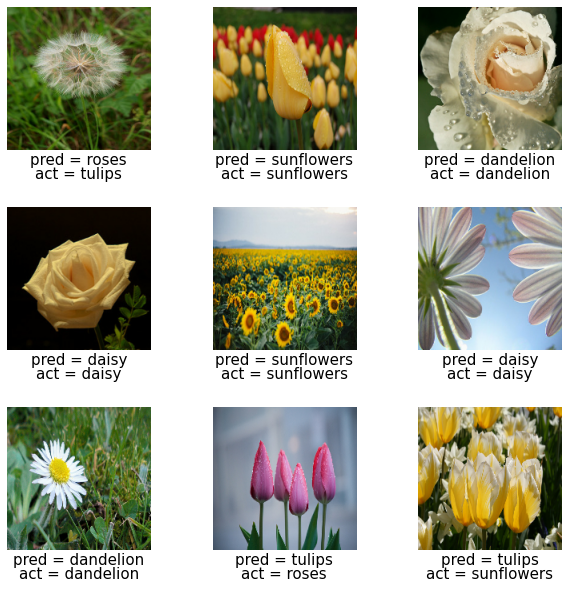

In [69]:
n_to_show = 3
indices = np.random.choice(range(len(val_ds)), n_to_show)

# fig = plt.figure(figsize=(15, 3))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

# test_ds = list(val_ds.as_numpy_iterator()) 

fig =  plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for images, labels in val_ds.take(1):
    for idx in range(9):
        img = images[idx].numpy().astype("uint8")

        ax = fig.add_subplot(3, n_to_show, idx+1)
        ax.axis('off')
        ax.text(0.5, -0.1, 'pred = ' + str(preds_single[idx]), fontsize=15, ha='center', transform=ax.transAxes) 
        ax.text(0.5, -0.2, 'act = ' + str(actual_single[idx]), fontsize=15, ha='center', transform=ax.transAxes)
        ax.imshow(img)